# Seminar 6: Queuing Systems

In [1]:
import numpy as np
import scipy.stats as stats

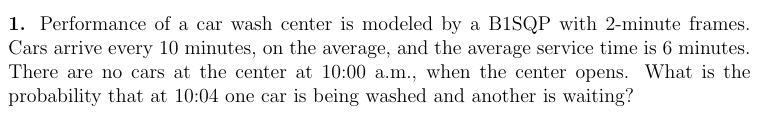

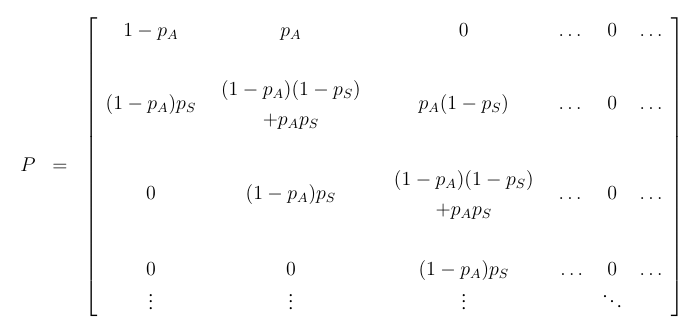

$$\mu_S = 6min,\ \mu_A = 10min,\ \Delta = 2min$$
$$\lambda_S = 1 / \mu_S,\ \lambda_A = 1 / \mu_A $$
$$ p_A = \lambda_A \cdot \Delta,\ p_S = \lambda_S \cdot \Delta$$

In [112]:
# minutes as measure
delta = 2

l_S = 1 / 6
p_S = l_S * delta

l_A = 1 / 10
p_A = l_A * delta

print(p_A, p_S)

1/5 1/3


In [113]:
t = 4 # total time
n = int(t / delta) # number of frames

In [85]:
first_row = np.array(
    [1 - p_A, p_A, 0] + 
    [0] * n
)
general_row = np.array([
    (1 - p_A) * p_S,
    (1 - p_A) * (1 - p_S) + p_A * p_S,
    p_A * (1 - p_S)
] + [0] * n)
other_rows = [np.roll(general_row, shift=i) for i in range(n + 2)]
P = np.vstack([first_row] + other_rows)
P[-1, 0] = 0
P

array([[0.8       , 0.2       , 0.        , 0.        , 0.        ],
       [0.26666667, 0.6       , 0.13333333, 0.        , 0.        ],
       [0.        , 0.26666667, 0.6       , 0.13333333, 0.        ],
       [0.        , 0.        , 0.26666667, 0.6       , 0.13333333],
       [0.        , 0.        , 0.        , 0.26666667, 0.6       ]])

In [78]:
# no cars => no jobs in queue
P0 = np.array([1, 0, 0] + [0] * n)
(P0 @ np.linalg.matrix_power(P, 2))[2]

0.02666666666666667

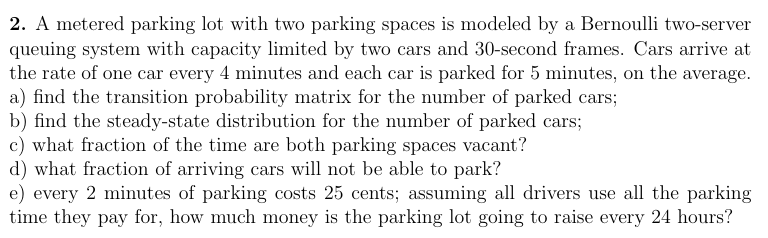

### a)

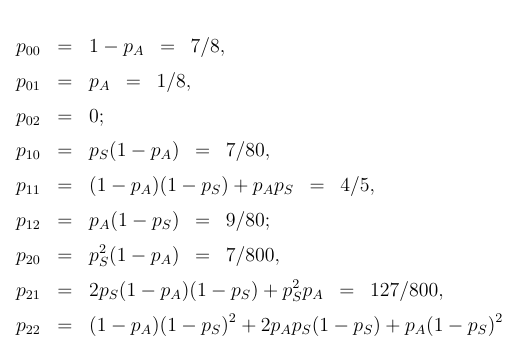

In [89]:
C = 2 # capacity
delta = 30 / 60 # minutes
l_A = 1 / 4
p_A = l_A * delta

l_S = 1 / 5
p_S = l_S * delta

print(p_A, p_S)

1/8 1/10


In [96]:
first_row = np.array([1 - p_A, p_A, 0])
second_row = np.array([
    p_S * (1 - p_A),
    (1 - p_A) * (1 - p_S) + p_A * p_S,
    p_A * (1 - p_S)
])
third_row = np.array([
    p_S ** 2 * (1 - p_A),
    2 * p_S * (1 - p_A) * (1 - p_S) + p_S ** 2 * p_A,
    (1 - p_A) * (1 - p_S) ** 2 + 2 * p_A * p_S * (1 - p_S) + p_A * (1 - p_S) ** 2
])

P = np.vstack([first_row] + [second_row] + [third_row])
P

array([[0.875  , 0.125  , 0.     ],
       [0.0875 , 0.8    , 0.1125 ],
       [0.00875, 0.15875, 0.8325 ]])

### b)

In [99]:
# Create the coefficient matrix A (4x3)
A = np.vstack([
    P.T - np.eye(3),  # First 3 rows from πP = π equations
    np.ones((1, 3))   # Last row from Σπᵢ = 1 equation
])

# Create the right-hand side vector b (4x1)
b = np.array([0, 0, 0, 1])

# Solve the system Ax = b
# equivalent to x = A\b
x = np.linalg.lstsq(A, b, rcond=None)[0]

x

array([0.30885529, 0.41345264, 0.27769207])

### c), d)

In [103]:
print(f"c): {x[0]}\nd): {x[2]}")

c): 0.3088552915766743
d): 0.2776920703486577


### e)

In [116]:
mean = 0
for i, val in enumerate(x):
    mean += (i * val)

# 
'''
mean     - average number of cars parked
24 * 60  - minutes in a day
0.25 / 2 - dollars a minute
'''
print(f"${float(mean * 24 * 60 * 0.25 / 2):.3f}")

$174.391


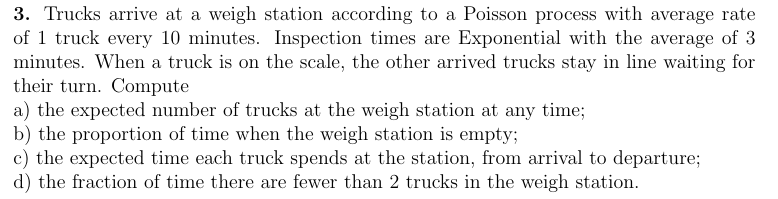

$$ \lambda_A = 1 / 10min,\ \mu_S = 3min,\ \lambda_S = 1 / 3min $$
$$ r = \frac{\lambda_A}{\lambda_S} $$

In [118]:
l_A = 1 / 10
l_S = 1 / 3
r = l_A / l_S
r

3/10

$$ r = \frac{3}{10} \lt 1 $$ 

### a)
$$ E(X) = \frac{r}{1 - r} - \text{average number of trucks at the weigh station at any time}$$

In [119]:
mean = r / (1 - r)
mean

3/7

### b)
$$ P(X = 0) = 1 - r $$

In [123]:
print(1 - r)

7/10


### c)
$$ E(R) = \frac{r}{\lambda_A \left(1 - r\right)} $$

In [124]:
print(mean / l_A)

30/7


### d)
$$ \pi_i = r^i\left(1 - r\right) $$ 
$$ P(X \lt 2) = P(X = 0) + P (X = 1) = \pi_0 + \pi_1$$

In [147]:
pi = np.zeros(2)
for idx, _ in enumerate(pi):
    pi[idx] = r ** idx * (1 - r)
print(np.sum(pi))


0.9099999999999999


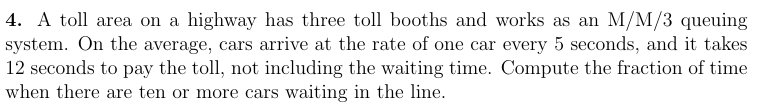

In [150]:
# in seconds
l_A = 1 / 5
l_S = 1 / 12
r = l_A / l_S
r

12/5

$$ r = \frac{12}{5} \lt 3 $$
$$ P(X_w \ge 10) = P(X \ge 13) = \sum_{k = 13}^{\infty}\pi_k$$

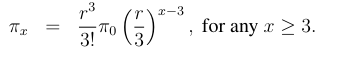

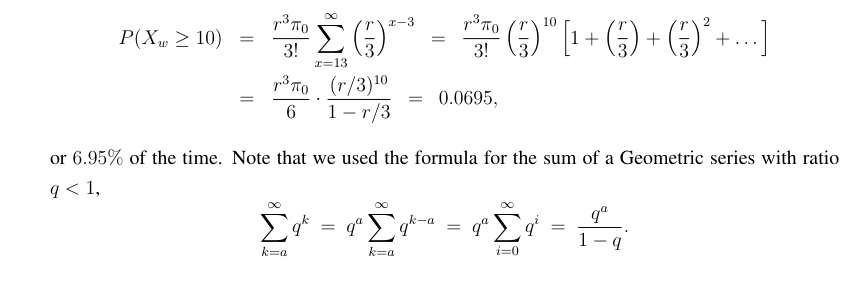

In [159]:
pi_0 = 1 / (1 + r + r**2/2 + r**3/(6*(1-r/3)))

left = r**3 * pi_0 / math.factorial(3)
right = (r/3) ** 10 / (1 - r/3)

float(left * right)

0.06949160568808989

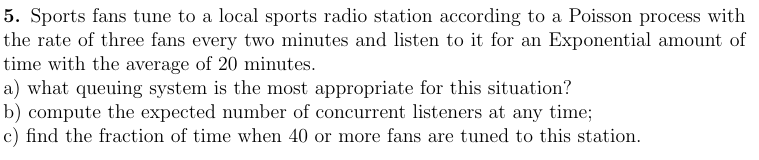

### a) M/M/$\infty$

- Poisson process of arrivals => Exponential interarrival times
- Exponential service times
- Infinite servers

### b) $E(X) = r - \text{expected number of concurrent listeners at a time}$

In [160]:
l_A = 3 / 2
l_S = 1 / 20
r = l_A / l_S
r

30

### c)

$$ P(X \gt 40) = 1 - P(X \lt 40) = 1 - P(X \le 39) $$

In [162]:
# poisson counts rare events
1 - stats.poisson.cdf(39, r)

0.0462530376458421

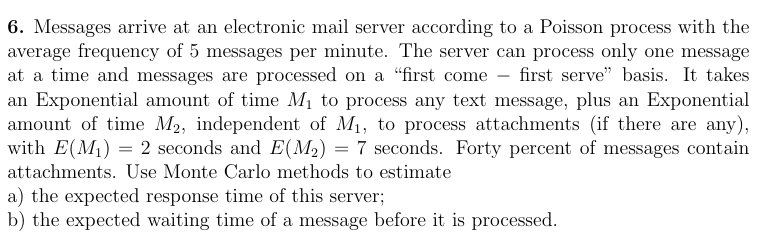

In [163]:
# seconds
l_A = 1 / (5 * 60)
l_text = 1 / 2
l_attach = 1 / 7
p = 0.4

### a) $E(R)$

In [211]:
from collections import deque

def simulate_mail(l_A):
    queue = deque()
    server_busy_until = 0
    arrivals = []
    wait_times = []
    response_times = []
    
    # Simulate for 1 hour
    current_time = 0
    while current_time < 3600:
        # Generate next arrival
        current_time += stats.expon.rvs(scale=l_A)
        
        # Process queue and server until this arrival
        while queue and queue[0] <= current_time:
            job_arrival = queue.popleft()
            wait_time = max(0, server_busy_until - job_arrival)
            process_time = stats.expon.rvs(scale=E_M1)
            if np.random.random() < p_attach:
                process_time += stats.expon.rvs(scale=E_M2)
            
            server_busy_until = max(
                job_arrival + wait_time + process_time, 
                server_busy_until + process_time
            )
            
            wait_times.append(wait_time)
            response_times.append(wait_time + process_time)
        
        # Add new arrival to queue
        queue.append(current_time)
    
    return np.mean(response_times), np.mean(wait_times)

In [214]:
N = 100
l_A = 60 * 1 / 5  # seconds
E_M1 = 2  # seconds
E_M2 = 7  # seconds
p_attach = 0.4

results = [simulate_mail(l_A) for _ in range(N)]
E_R = np.mean([r[0] for r in results])
E_W = np.mean([r[1] for r in results])

print(f"E(R) = {E_R:.2f} seconds")
print(f"E(W) = {E_W:.2f} seconds")

E(R) = 8.83 seconds
E(W) = 4.01 seconds


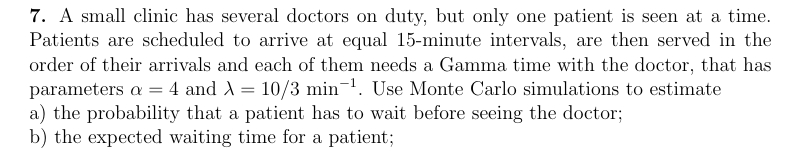

In [210]:
def simulate_clinic(alpha, l, delta):
    server_busy_until = 0
    wait_times = []
    had_to_wait = 0
    total_patients = 0
    
    # Simulate 8-hour day
    for arrival_time in range(0, 480, delta):
        wait_time = max(0, server_busy_until - arrival_time)
        service_time = stats.gamma.rvs(a=alpha, scale=l)
        
        if wait_time > 0:
            had_to_wait += 1
            
        server_busy_until = max(arrival_time, server_busy_until) + service_time
        wait_times.append(wait_time)
        total_patients += 1
    
    return had_to_wait/total_patients, np.mean(wait_times)

In [207]:
n = 1000
delta = 15
alpha = 4
l = 10/3

results = [simulate_clinic(alpha, l, delta) for _ in range(n)]
p_wait = np.mean([r[0] for r in results])
E_wait = np.mean([r[1] for r in results])

print(f"P(wait) = {p_wait:.3f}")
print(f"E(wait) = {E_wait:.2f} minutes")

P(wait) = 0.585
E(wait) = 7.32 minutes
